In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os
from natsort import natsorted
import pyvista as pv

from myusefultools.parser import integrateDataOverTime

In [2]:
path = "/home/edsaa/nuModel/tempResults_review/refactored_dp9.RANS"
RAS = integrateDataOverTime(path)
RAS.drop(columns=["U","hPrime2Mean","Volume","cellID"],inplace=True)

In [4]:
path = "/home/edsaa/nuModel/tempResults_review/refactored_dp9A.LES"
LES = integrateDataOverTime(path)
LES.drop(columns=["U","hPrime2Mean","Volume","cellID"],inplace=True)

In [5]:
LES['Time (d)'] = LES['Time (s)']/86400
RAS['Time (d)'] = RAS['Time (s)']/86400

In [6]:
Axy = 0.29*0.15
RASReg = linregress(RAS['Time (d)'],RAS['depositedClay']/Axy)
LESReg = linregress(LES['Time (d)'],LES['depositedClay']/Axy)

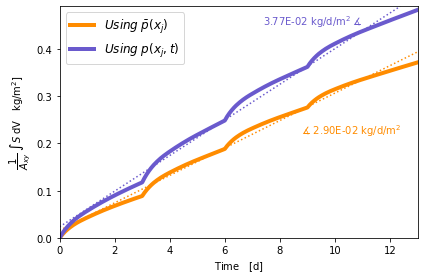

In [7]:
fig,ax = plt.subplots(tight_layout=True)
ax.plot(RAS['Time (d)'],RAS['depositedClay']/Axy,
        lw=4,label=r'${Using \; \bar{p}(x_j)}$',c='darkorange')
ax.axline((0,RASReg.intercept),slope=RASReg.slope,c='darkorange',ls='dotted')

ax.plot(LES['Time (d)'],LES['depositedClay']/Axy,
        lw=4,label=r'${Using \; p(x_j,t)}$',c='slateblue')
ax.axline((0,LESReg.intercept),slope=LESReg.slope,c='slateblue',ls='dotted')

ax.set_xlabel(r"$\mathsf{Time} \quad  \mathsf{[d]}$")
ax.set_ylabel(r"$\dfrac{1}{A_{xy}} \; \int S \; \mathsf{dV} \quad \mathsf{kg/m^2]}$")
ax.set(xlim=[0,13],ylim=[0,0.49])
ax.legend(fontsize=12)

ax.text(11,0.45,"{:.2E}".format(LESReg.slope) + r" $\mathsf{kg/d/m^2} \; \measuredangle$",ha='right',c='slateblue')
ax.text(12.4,0.22,"$\measuredangle \;$" + "{:.2E}".format(RASReg.slope) + r" $\mathsf{kg/d/m^2}$",ha='right',c='darkorange')

#plt.savefig("IntegrationOverTime/Integral.svg")
plt.show()